In [1]:
%%capture
!pip install pythtb

In [2]:
from pylab import *
from pythtb import *

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.display import Image

El siguiente paso en el trabajo de investigación es la inclusión de la interacción en el Hamiltoniano  con un potencial escalar periódico en el tiempo. Por lo que se utilizará la Teoría de Floquet 

# Teoría de Floquet
Estudia sistemas cuánticos descritos por hamiltonianos periódicos en el tiempo, $H(t) = H (t + \mathcal{T})$, de modo que la ecuación de Schrödinger correspondiente es: \\
\begin{equation}
    \bigg ( H (r,t) - i\hbar\frac{\delta}{\delta t} \bigg ) \Psi(r,t) = 0\,.
\end{equation}
El teorema de Floquet establece que existen soluciones para la ecuación anterior de la forma: 
\begin{equation}
    \Psi (r,t) = e^{\frac{-i \epsilon t}{\hbar}} \Phi (r,t)\,,
\end{equation}

donde $\Phi$ es una función periódica en el tiempo con el mismo período del Hamiltoniano, $\Phi(\mathbf{r},t) = \Phi(\mathbf{r},t + T)$. y $\epsilon$ es un parámetro real que se denomina cuasi-energía.

# Teoría de Floquet aplicada a nuestro Hamiltoniano $H_4(k)$

\begin{align}
H_4({k},wt) = &\bigg(  \mu_0+\Theta \sum_i\cos (k_i a) + \mu_1 \cos(wt)  \bigg)\tau_z\sigma_0 +\Delta_1\sum_i \sin (k_i a)\tau_x\sigma_i \nonumber +\Delta_2 \big[\cos (k_x a)-\cos (k_y a)\big]\tau_y\sigma_0\ 
\end{align}

Experimentalmente, el término $\mu_1cos(wt)$ correspondería a someter al material a una diferencia de potencial externo; por ejemplo, estre dos placas de un capacitor.

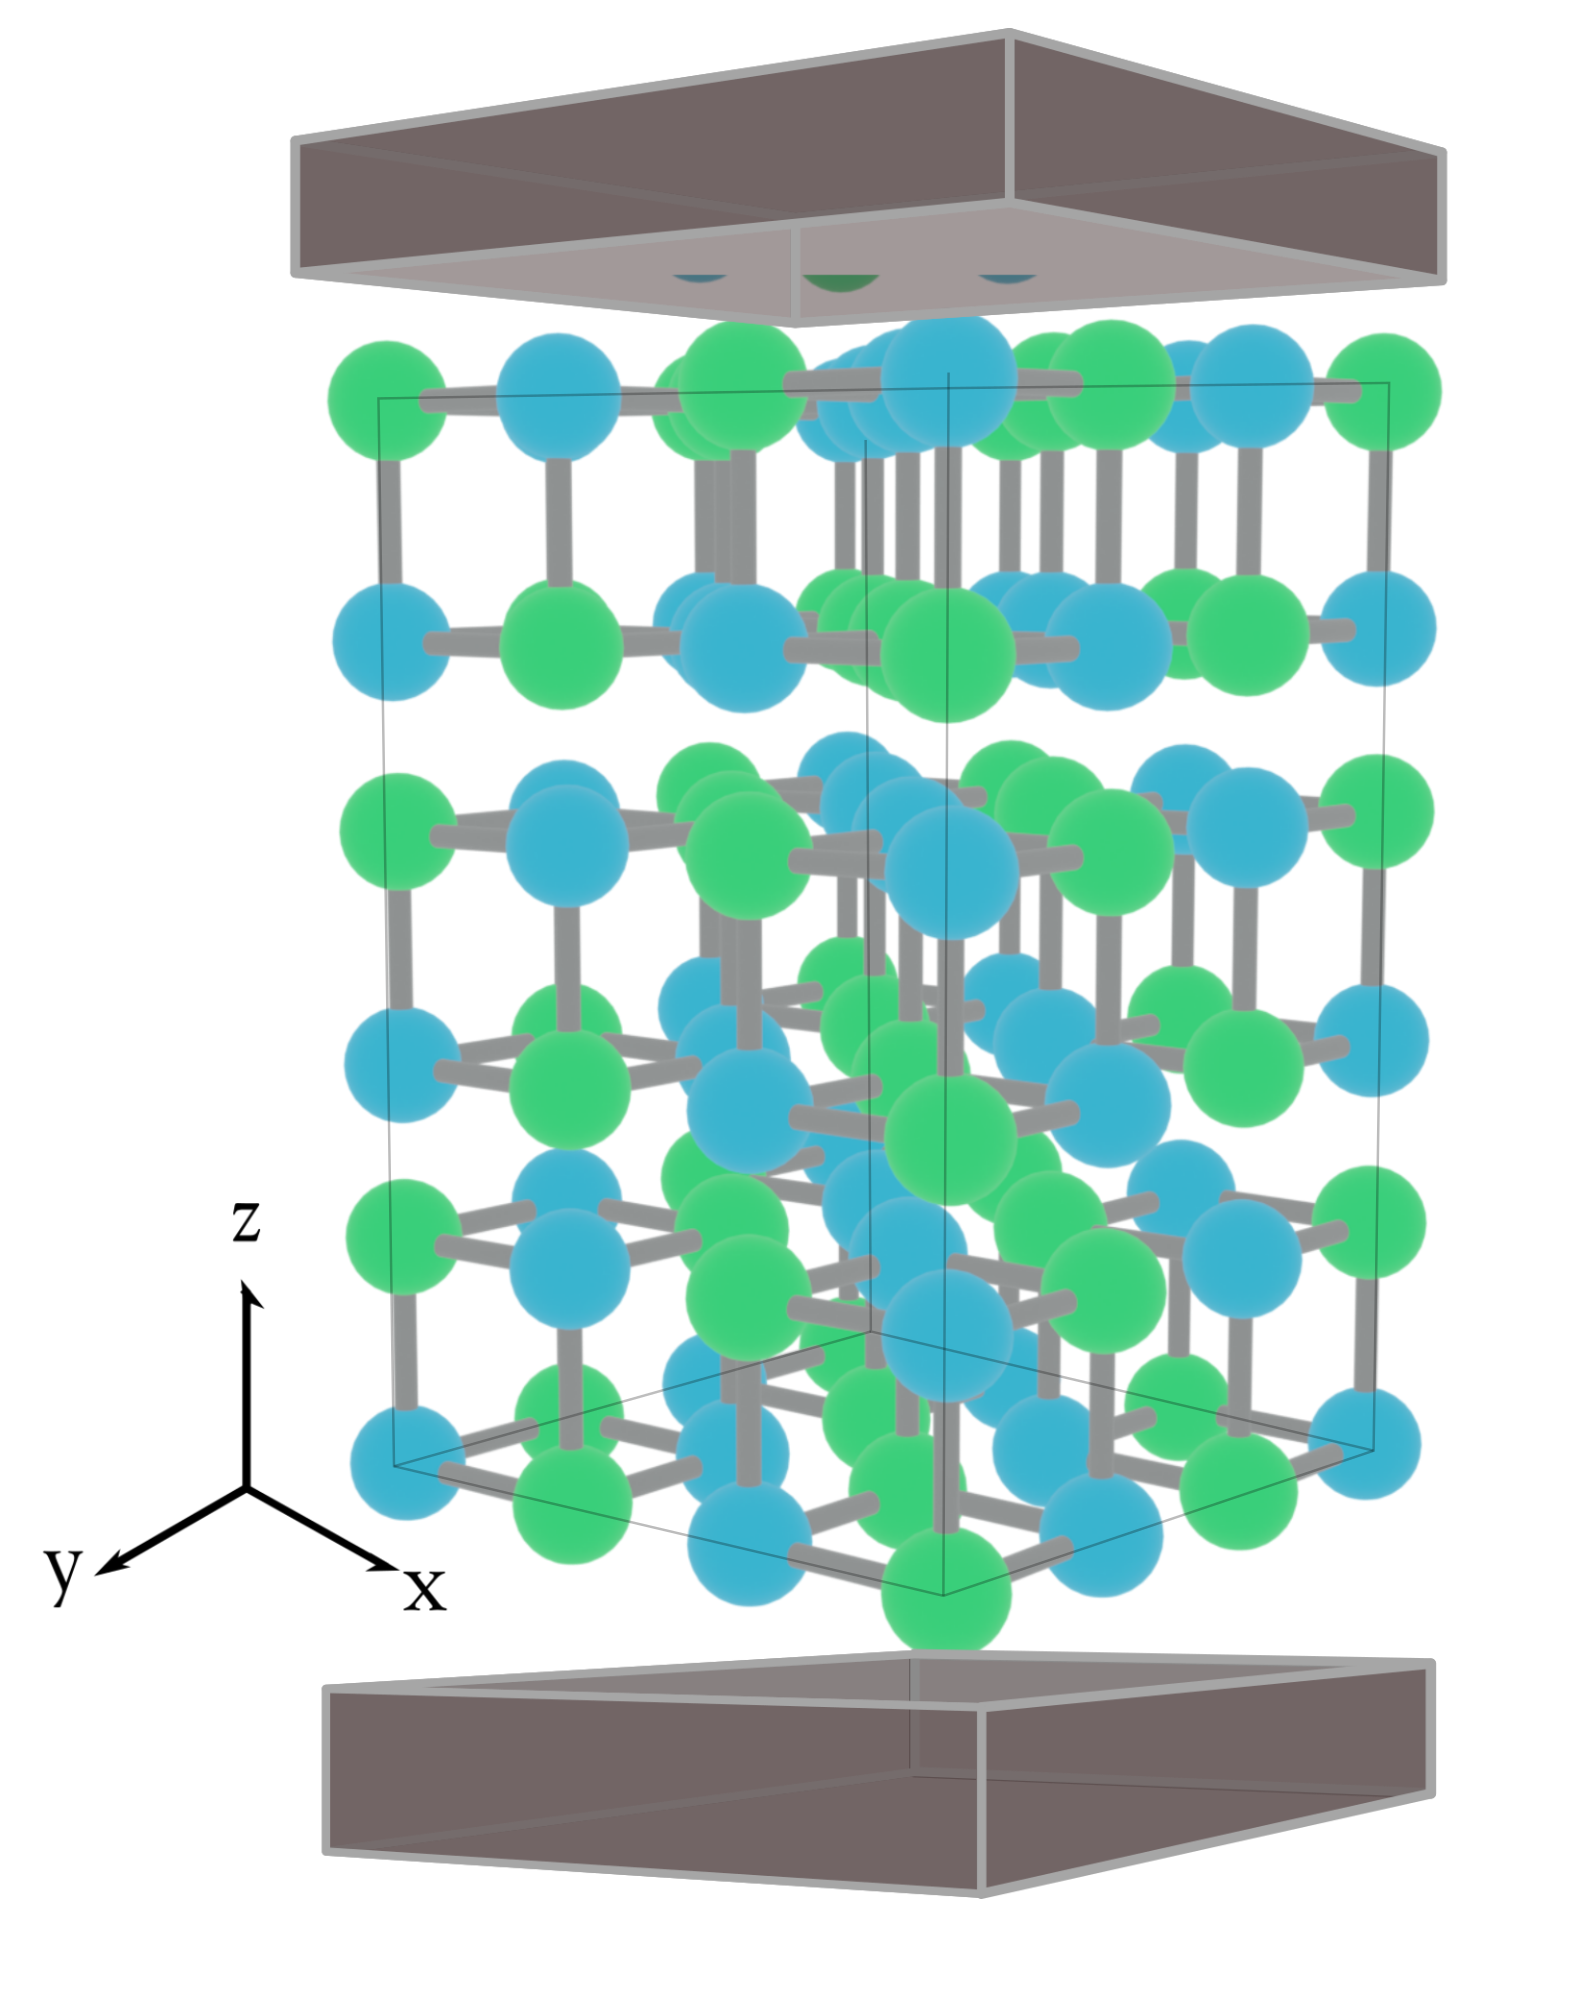

In [4]:
Image(filename = "bitmap.png", width = 400)

Partiendo del Hamiltoniano en el espacio recíproco que describe a nuestro sistema. Aplicando la teoría de Floquet, obtenemos los elementos de matriz en función del tiempo. Utilizando los téminos mostrados a continuación podemos escribir la matriz asociada al operador de Floquet, HF, obteniendo así nuestra matriz infinita la cual está compuesta por réplicas (n',n), en otras palabras, esta asociado a términos de Fourier.

\begin{align}
    H_4^{n,n}({k},\omega t) = \bigg( \mu_0+\Theta \sum_{i=x,y,z}\cos (k_i a)  \bigg) \tau_z\sigma_0
    +\Delta_1\sum_{i=x,y,z} \sin (k_i a) \tau_x\sigma_i
    +\Delta_2 \big[\cos (k_x a)-\cos (k_y a)\big]\tau_y\sigma_0 - n\hbar\omega
\end{align}


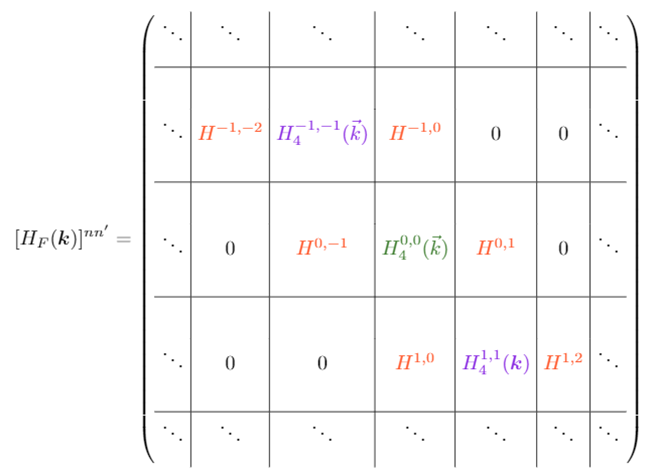

In [5]:
Image(filename = "Matriz infinita.png", width = 400)

In [6]:
lat = [[1.0,0.0,0.0,0.0],
       [0.0,1.0,0.0,0.0],
       [0.0,0.0,1.0,0.0],
       [0.0,0.0,0.0,1.0]] 
orb = []
nrepl = 4
for n in arange(-nrepl,nrepl+1): 
  orb.append( [0.0,0.0,0.0,n] )
  orb.append( [1/4,1/4,1/4,n] )
  orb.append( [0.5,0.5,0.5,n] )
  orb.append( [3/4,3/4,3/4,n] )

In [7]:
# Parámetros del modelo
µ0 = 2.0
µ1 = 0.1 # 0.1
Θ  = 1.0
Δ1 = 1.0
Δ2 = 1.0
ħω = 0.2 # 0.2


my_model = tb_model(4,4,lat,orb)  

In [8]:
onsite = []
for n in arange(-nrepl,nrepl+1):
  onsite.append( µ0+n*ħω )
  onsite.append(-µ0+n*ħω )
  onsite.append( µ0+n*ħω )
  onsite.append(-µ0+n*ħω )
print(len(onsite))
my_model.set_sites( onsite )

for s in arange( 0,(nrepl*2+1)*4,4 ):
  # Hoppings sin dependencia temporal
  my_model.set_hop(  Θ/2, 0+s, 0+s, [1, 0, 0, 0])  
  my_model.set_hop(  Θ/2, 0+s, 0+s, [0, 1, 0, 0])
  my_model.set_hop(  Θ/2, 0+s, 0+s, [0, 0, 1, 0])

  my_model.set_hop( -Θ/2, 1+s, 1+s, [1, 0, 0, 0])
  my_model.set_hop( -Θ/2, 1+s, 1+s, [0, 1, 0, 0])
  my_model.set_hop( -Θ/2, 1+s, 1+s, [0, 0, 1, 0])

  my_model.set_hop(  Θ/2, 2+s, 2+s, [1, 0, 0, 0])
  my_model.set_hop(  Θ/2, 2+s, 2+s, [0, 1, 0, 0])
  my_model.set_hop(  Θ/2, 2+s, 2+s, [0, 0, 1, 0])

  my_model.set_hop( -Θ/2, 3+s, 3+s, [1, 0, 0, 0])
  my_model.set_hop( -Θ/2, 3+s, 3+s, [0, 1, 0, 0])
  my_model.set_hop( -Θ/2, 3+s, 3+s, [0, 0, 1, 0])

  my_model.set_hop(    Δ1/(2J), 0+s, 1+s, [ 0,  0,  1, 0])
  my_model.set_hop(   -Δ1/(2J), 0+s, 1+s, [ 0,  0, -1, 0])

  my_model.set_hop( -(1J*Δ2)/2, 0+s, 1+s, [ 1,  0,  0, 0])
  my_model.set_hop( -(1J*Δ2)/2, 0+s, 1+s, [-1,  0,  0, 0])

  my_model.set_hop( +(1J*Δ2)/2, 0+s, 1+s, [ 0,  1,  0, 0])
  my_model.set_hop( +(1J*Δ2)/2, 0+s, 1+s, [ 0, -1,  0, 0])

  my_model.set_hop(    Δ1/(2J), 0+s, 3+s, [ 1,  0,  0, 0])
  my_model.set_hop(   -Δ1/(2J), 0+s, 3+s, [-1,  0,  0, 0]) #Done

  my_model.set_hop(      -Δ1/2, 0+s, 3+s, [ 0,  1,  0, 0])
  my_model.set_hop(      +Δ1/2, 0+s, 3+s, [ 0, -1,  0, 0])

  my_model.set_hop(    Δ1/(2J), 1+s, 2+s, [ 1,  0,  0, 0]) #k
  my_model.set_hop(   -Δ1/(2J), 1+s, 2+s, [-1,  0,  0, 0])

  my_model.set_hop(      -Δ1/2, 1+s, 2+s, [ 0,  1,  0, 0])
  my_model.set_hop(      +Δ1/2, 1+s, 2+s, [ 0, -1,  0, 0])

  my_model.set_hop(  +(1J*Δ2)/2, 3+s, 2+s, [ 1,  0,  0, 0])
  my_model.set_hop(  +(1J*Δ2)/2, 3+s, 2+s, [-1,  0,  0, 0])

  my_model.set_hop(  -(1J*Δ2)/2, 3+s, 2+s, [ 0,  1,  0, 0])
  my_model.set_hop(  -(1J*Δ2)/2, 3+s, 2+s, [ 0, -1,  0, 0])

  my_model.set_hop(  -Δ1/(2J), 3+s, 2+s, [ 0,  0,  1, 0])
  my_model.set_hop(  +Δ1/(2J), 3+s, 2+s, [ 0,  0, -1, 0])

for s in arange( 0,(nrepl*2)*4,4 ):
  my_model.set_hop(  µ1/2, 0+s, 0+4+s, [0, 0, 0, 0] ) 
  my_model.set_hop( -µ1/2, 1+s, 1+4+s, [0, 0, 0, 0] )
  my_model.set_hop(  µ1/2, 2+s, 2+4+s, [0, 0, 0, 0] )
  my_model.set_hop( -µ1/2, 3+s, 3+4+s, [0, 0, 0, 0] )

36


In [9]:
SinTiempo = my_model.cut_piece(1,3,glue_edgs=False)

In [10]:
# camino en el espacio recíproco
path=[ [ 0.0, 0.0 ,0.0], # Gamma
        [ 0.5, 0.0 ,0.0], # X
        [ 0.5, 0.5 ,0.0], # XY
        [ 0.0, 0.5, 0.0], # Y
        [ 0.0, 0.5, 0.5], # YZ
        [ 0.0, 0.0, 0.5], # Z
        [ 0.0, 0.0, 0.0] ]
k_label = (r'$\Gamma$',
           r'$X$',
           r'$XY$', 
           r'$Y$',
           r'$YZ$',
           r'$Z$',
           r'$\Gamma$')
(k_vec,k_dist,k_node) = SinTiempo.k_path(path,1001, report=False)

In [11]:
Ek,U = SinTiempo.solve_all(k_vec,eig_vectors=True)

In [12]:
shape(Ek)
nband,nk = shape(Ek)

Se observa el comportamiento correspondiente a los niveles sin absorción o emisión de fotones; es decir, el peso de la réplica 0, que a continuación denotaremos como la función **enmedio**. El peso de la replica 0 corresponderá a los coeficientes al cuadrado de dichos valores.

In [13]:
# Ejemplo: repl=4
# Tenemos -4,-3,-2,-1,0,1,2,3,4 (9 replicas)
# Esperariamos observar únicamento el comportamiento correspondiente
# a los niveles sin absorción o emisión de fotones; es decir, el peso 
# de la réplica 0

# Nos damos cuenta que los eigenvectores tienen
# 36 componentes
"""
[0,1,2,3,     # replica -4
 4,5,6,7,     # replica -3
 8, 9,10,11,  # replica -2
 12,13,14,15, # replica -1
 16,17,18,19, # replica 0
 20,21,22,23, # replica 1
 24,25,26,27, # replica 2
 28,29,30,31, # replica 3
 32,33,34,35] # replica 4
"""
# El peso de la replica 0 corresponderá a los 
# coeficientes al cuadrado de 16,17,18 y 19. 
# Estos coeficientes al cuadrado, corresponden a 
# la función que llammos "enmedio"



'\n[0,1,2,3,     # replica -4\n 4,5,6,7,     # replica -3\n 8, 9,10,11,  # replica -2\n 12,13,14,15, # replica -1\n 16,17,18,19, # replica 0\n 20,21,22,23, # replica 1\n 24,25,26,27, # replica 2\n 28,29,30,31, # replica 3\n 32,33,34,35] # replica 4\n'

In [14]:
# nband es el índice de la banda
# nk es el índice de k
# index es el término de las componentes (de la base)

In [15]:
enmedio = (2*nrepl+1)*4//2
Weight = zeros((nband,nk))
for n in range(nband):
  for ik in range(nk):
    w = U[n][ik][enmedio-2]*conj(U[n][ik][enmedio-2])\
      + U[n][ik][enmedio-1]*conj(U[n][ik][enmedio-1])\
      + U[n][ik][enmedio]*conj(U[n][ik][enmedio])\
      + U[n][ik][enmedio+1]*conj(U[n][ik][enmedio+1])
    Weight[n,ik] = real( w )

Done.



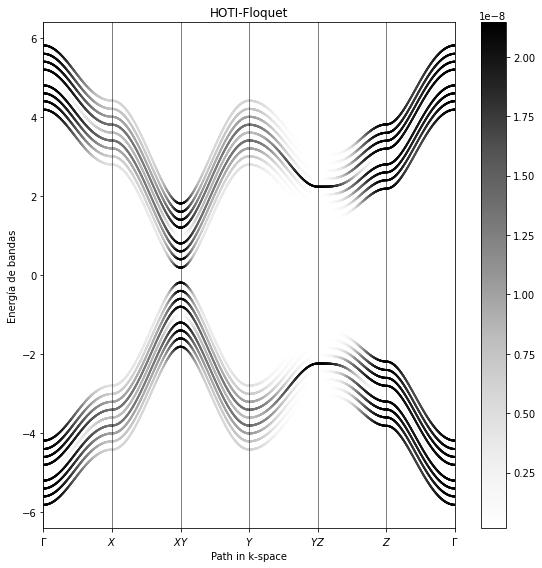

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Bandstructure")
ax.set_ylabel("Band energy")

# specify horizontal axis details
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')


for n in range((nrepl*2+1)*4):
  indOrden = argsort(Weight[n])
  grafica = ax.scatter (k_dist[indOrden],Ek[n][indOrden],c=Weight[n][indOrden],s=1,cmap='Greys')

ax.set_title("HOTI-Floquet")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Energía de bandas")

fig.tight_layout()
fig.colorbar(grafica)
fig.savefig("mu_0=1.0.png")
print('Done.\n')


# Modelo finito

In [ ]:
%%time
len_0=5
len_1=5
len_2=10

slab1 = SinTiempo.cut_piece(len_1,1,glue_edgs=False)
slab2 = slab1.cut_piece(len_0,0,glue_edgs=False)

k = [ [0.0], [1.0] ]
(k_vec,k_dist,k_node) = slab2.k_path(k,101,report=False)

Ek,U = slab2.solve_all(k_vec,eig_vectors=True)

CPU times: user 3min 28s, sys: 26.7 s, total: 3min 55s
Wall time: 2min 4s


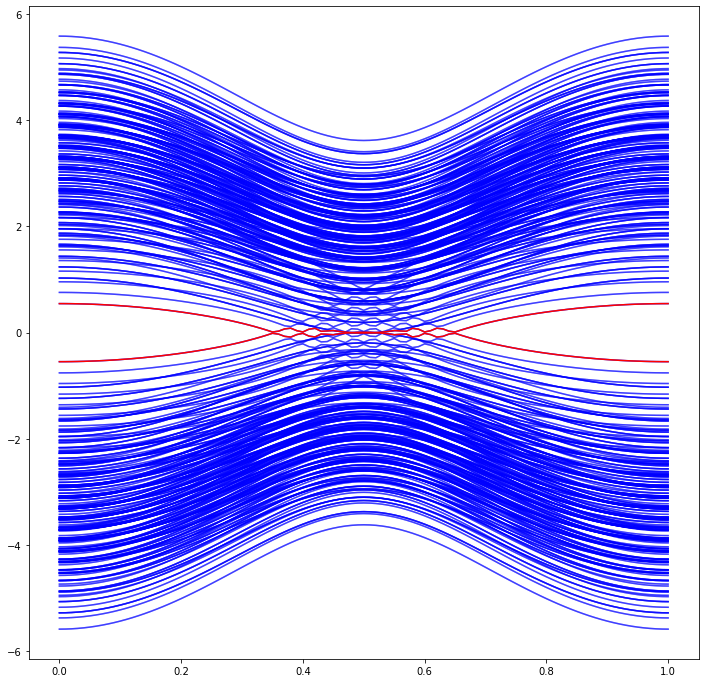

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
for n in range(len(Ek)):
    ax.plot( k_dist, Ek[n], 'b',alpha=0.5)
ax.plot( k_dist, Ek[len(Ek)//2 ], 'r')
ax.plot( k_dist, Ek[len(Ek)//2 -1] , 'r')
fig.savefig("HOTI-Floquet.png")